In [2]:
import numpy as np
import requests
import pandas as pd
import time

In [12]:
# pushshift params
# might have to change 'size' at some point 

params = {
    'subreddit': 'Stoicism',
    'size': 1000
}

In [13]:
post_url = 'https://api.pushshift.io/reddit/submission/search'

In [14]:
# requests.get method

res = requests.get(post_url, params)

In [15]:
res.status_code

200

In [16]:
res.json().keys()

dict_keys(['data'])

In [17]:
pd.DataFrame(res.json()['data']).shape

(100, 74)

In [18]:
# control flow for above 

res = requests.get(post_url, params)

if res.status_code == 200:
    posts_df = pd.DataFrame(res.json()['data'])
else:
    print(res.status_code)

In [31]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        100 non-null    object
 1   selftext     100 non-null    object
 2   score        100 non-null    int64 
 3   created_utc  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [20]:
posts_df = posts_df[['title', 'selftext', 'score', 'created_utc']]

In [21]:
posts_df.head()

,title,selftext,score,created_utc
0,MEMENTO MORI Calende Free,"Hello guys, \n\nSo I saw one of these of memen...",1,1609014580
1,Treatment of people,Marcus Aurelius said that you should treat all...,1,1609002105
2,“Scorn cannot challenge you if you are not vai...,This is a quite from Swiss psychologist Carl J...,1,1608999078
3,Are practices like reuse/recycle and buys used...,I do not like replacing things that still work...,1,1608998086
4,Can Stoics be Activists? Debate and discussion.,,1,1608995089


In [22]:
comment_url = 'https://api.pushshift.io/reddit/comment/search'

In [25]:
# same as above but for comments

res = requests.get(comment_url, params)

if res.status_code == 200:
    comments_df = pd.DataFrame(res.json()['data'])
else:
    print(res.status_code)

In [26]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   all_awardings                    100 non-null    object
 1   associated_award                 0 non-null      object
 2   author                           100 non-null    object
 3   author_flair_background_color    0 non-null      object
 4   author_flair_css_class           0 non-null      object
 5   author_flair_richtext            100 non-null    object
 6   author_flair_template_id         0 non-null      object
 7   author_flair_text                0 non-null      object
 8   author_flair_text_color          0 non-null      object
 9   author_flair_type                100 non-null    object
 10  author_fullname                  100 non-null    object
 11  author_patreon_flair             100 non-null    bool  
 12  author_premium                   100 

In [27]:
comments_df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags
0,[],None,ohsolinkable,None,None,[],None,None,None,text,...,/r/Stoicism/comments/kkgllw/if_this_sub_will_n...,1609017468,1,True,False,Stoicism,t5_2r4kq,None,0,[]
1,[],None,Benjowenjo,None,None,[],None,None,None,text,...,/r/Stoicism/comments/kjccht/isnt_my_way_the_pe...,1609017212,1,True,False,Stoicism,t5_2r4kq,None,0,[]
2,[],None,thejaytheory,None,None,[],None,None,None,text,...,/r/Stoicism/comments/kkgllw/if_this_sub_will_n...,1609017024,1,True,False,Stoicism,t5_2r4kq,None,0,[]
3,[],None,Scipion333,None,None,[],None,None,None,text,...,/r/Stoicism/comments/kkgllw/if_this_sub_will_n...,1609016811,1,True,False,Stoicism,t5_2r4kq,None,0,[]
4,[],None,universe-atom,None,None,[],None,None,None,text,...,/r/Stoicism/comments/kk9bv1/book_for_when_life...,1609016754,1,True,False,Stoicism,t5_2r4kq,None,0,[]


In [28]:
comments_df[['body', 'created_utc']]

,body,created_utc
0,This entire thread goes against your own philo...,1609017458
1,I think he struggled with anger management iss...,1609017201
2,"I think you're cool man, I think you meant wel...",1609017012
3,"Of course not, narcissism is the core principl...",1609016800
4,"Read it several times, take notes. Condense th...",1609016743
...,...,...
95,"Yes, please. Ban Images.",1609003301
96,I both agree and disagree. Rigor is important ...,1609003258
97,I agree. However there is the issue of this ph...,1609003149
98,This gets back to the concept everyone is to b...,1609002862


In [29]:
posts_df['created_utc'].max()

1609014580

In [30]:
posts_df['created_utc'].min()

1608738774

In [1]:
# just one example of a loop for pulling in subreddits
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 10
subreddit = 'Stoicism'

start_time = time.time()

params = {
    'subreddit': subreddit,
    'size': 100,
    'before': round(start_time)
}

for i in range(loops):
    current_time = time.time()
    
    #requesting data
#     try:
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)
    data = res.json()
    posts = data['data']
    
    post_df = pd.DataFrame(posts)
    
    dfs.append(post_df)
    
    #get oldest post time and use as before parameter in next request
    oldest = posts['created_utc'].min()
    params['before'] = oldest
    
    #sleep for 1 second
    time.sleep(1)
        
#     except:
#         pass

reddit_posts_stoic = pd.concat(dfs)

#filename = subreddit + '.csv'
#reddit_posts_stoic.to_csv('./datasets/' + filename, index=False)

NameError: name 'time' is not defined

In [30]:
reddit_posts_stoic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   all_awardings                1000 non-null   object 
 1   allow_live_comments          1000 non-null   bool   
 2   author                       1000 non-null   object 
 3   author_flair_css_class       0 non-null      object 
 4   author_flair_richtext        1000 non-null   object 
 5   author_flair_text            0 non-null      object 
 6   author_flair_type            1000 non-null   object 
 7   author_fullname              1000 non-null   object 
 8   author_patreon_flair         1000 non-null   bool   
 9   author_premium               1000 non-null   bool   
 10  awarders                     1000 non-null   object 
 11  can_mod_post                 1000 non-null   bool   
 12  contest_mode                 1000 non-null   bool   
 13  created_utc         

In [31]:
reddit_posts_stoic.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,url_overridden_by_dest,removed_by_category,crosspost_parent,crosspost_parent_list,poll_data,media,media_embed,secure_media,secure_media_embed,distinguished
0,[],False,RedNeck_Styles,None,[],None,text,t2_66defmzf,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,snowcroc,None,[],None,text,t2_ikv4e,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,anervousbull,None,[],None,text,t2_4wmg7hv4,False,False,...,https://i.redd.it/dpbey8krvu661.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,wallpapersdance,None,[],None,text,t2_7c2ofv4k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,stoicrookie09,None,[],None,text,t2_9ggszbx6,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
reddit_posts_stoic[['title', 'selftext', 'created_utc']]

,title,selftext,created_utc
0,"Is ""The Daily Stoic"" by Ryan Holiday good for ...",So I'm planning to get into stoicism to create...,1608698755
1,What are some small ways to practice stoicism?,This is not an easy path and we are all flawed...,1608694396
2,Stoicism,,1608694030
3,Questions for people who have experimented wit...,\n\n1. What ended up being effective for boos...,1608687664
4,Tips on how to handle unwanted opinions,"Hi, I'm very new to stoicism and I've been try...",1608684878
...,...,...,...
95,Where Spartans Stoic ?,,1608482202
96,Stoic Take On Depression(?),As I’m sure everyone is well aware this quaran...,1608481482
97,This belong here,,1608480271
98,Memento Mori,,1608480120


In [34]:
reddit_posts_stoic.created_utc.max()

1608698755

In [35]:
reddit_posts_stoic.created_utc.min()

1608479901

In [36]:
pd.to_datetime(reddit_posts_stoic['created_utc'], unit='s')

0    2020-12-23 04:45:55
1    2020-12-23 03:33:16
2    2020-12-23 03:27:10
3    2020-12-23 01:41:04
4    2020-12-23 00:54:38
             ...        
95   2020-12-20 16:36:42
96   2020-12-20 16:24:42
97   2020-12-20 16:04:31
98   2020-12-20 16:02:00
99   2020-12-20 15:58:21
Name: created_utc, Length: 1000, dtype: datetime64[ns]

In [38]:
reddit_posts_stoic['datetime'] = pd.to_datetime(reddit_posts_stoic['created_utc'], unit='s')

In [39]:
reddit_posts_stoic[['title', 'selftext', 'datetime']].head()

,title,selftext,datetime
0,"Is ""The Daily Stoic"" by Ryan Holiday good for ...",So I'm planning to get into stoicism to create...,2020-12-23 04:45:55
1,What are some small ways to practice stoicism?,This is not an easy path and we are all flawed...,2020-12-23 03:33:16
2,Stoicism,,2020-12-23 03:27:10
3,Questions for people who have experimented wit...,\n\n1. What ended up being effective for boos...,2020-12-23 01:41:04
4,Tips on how to handle unwanted opinions,"Hi, I'm very new to stoicism and I've been try...",2020-12-23 00:54:38


In [40]:
reddit_posts_stoic['merged'] = reddit_posts_stoic['title'] + " " + reddit_posts_stoic['selftext']

In [41]:
reddit_posts_stoic['title'].map(lambda x: len(x)).max()

276

In [45]:
# 5 longest posts

reddit_posts_stoic['selftext'].map(lambda x: len(x)).nlargest(10)

76    3356
76    3356
76    3356
76    3356
76    3356
76    3356
76    3356
76    3356
76    3356
76    3356
Name: selftext, dtype: int64

In [46]:
reddit_posts_stoic['selftext'].map(lambda x: len(x)).mean()

504.97

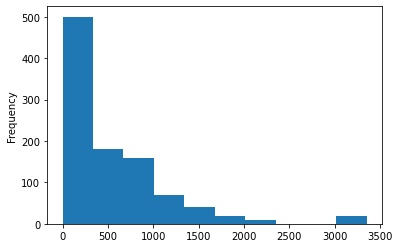

In [48]:
# distribution of post length 

reddit_posts_stoic['selftext'].map(lambda x: len(x)).plot(kind='hist');

In [49]:
len(reddit_posts_stoic.index)

1000

In [50]:
reddit_posts_stoic.shape

(1000, 75)

### PRACTICE HAM/SPAM! 

In [53]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk import FreqDist, pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [55]:
reddit_posts_stoic.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,crosspost_parent,crosspost_parent_list,poll_data,media,media_embed,secure_media,secure_media_embed,distinguished,datetime,merged
0,[],False,RedNeck_Styles,None,[],None,text,t2_66defmzf,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23 04:45:55,"Is ""The Daily Stoic"" by Ryan Holiday good for ..."
1,[],False,snowcroc,None,[],None,text,t2_ikv4e,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23 03:33:16,What are some small ways to practice stoicism?...
2,[],False,anervousbull,None,[],None,text,t2_4wmg7hv4,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23 03:27:10,Stoicism
3,[],False,wallpapersdance,None,[],None,text,t2_7c2ofv4k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23 01:41:04,Questions for people who have experimented wit...
4,[],False,stoicrookie09,None,[],None,text,t2_9ggszbx6,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-23 00:54:38,"Tips on how to handle unwanted opinions Hi, I'..."


In [56]:
reddit_posts_stoic.shape

(1000, 75)

In [57]:
body_text = list(reddit_posts_stoic['selftext'])

In [59]:
body_tokens = [word_tokenize(i) for i in body_text]

In [62]:
tagged_body = [pos_tag(i) for i in body_tokens]

In [64]:
pos_dict = {}

for i in range(len(body_text)):
    pos_dict[i] = dict(Counter(tag for word, tag in tagged_body[i]))

In [65]:
pos_df = pd.DataFrame(pos_dict).T

In [66]:
pos_df.head()

,RB,PRP,VBP,VBG,TO,VB,IN,NN,DT,JJ,...,POS,WRB,UH,FW,PDT,EX,#,NNPS,RBS,$
0,6.0,10.0,11.0,5.0,12.0,16.0,11.0,16.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,4.0,4.0,2.0,1.0,3.0,4.0,3.0,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.0,NaN,2.0,1.0,1.0,3.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,29.0,7.0,4.0,10.0,16.0,20.0,23.0,10.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
pos_df.shape

(1000, 42)

In [68]:
pos_df = pos_df.fillna(0.0)